# Proyek Analisis Data: Nama dataset
- Nama: Andhika Putra Pratama
- Email: andhikapratama
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

1. Pada musim apa penyewaan sepeda dengan rata-rata paling tinggi?
2. Berapa jumlah pelanggan member dan non member setiap bulan?
3. Berapa perbandingan jumlah sepeda yang disewa pada tahun 2011 dan 2012?

## Menyaipkan semua library yang dibuthkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data

In [5]:
day_df.isna().sum()
# mengidentifikasi dan missing value dalam sebuah DataFrame
# gender akan di cleaning

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day_df.info()
# melihat info data day (menilai data day)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
# periksa dan menghitung duplikasi data

Jumlah duplikasi:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_df.isna().sum()
# mengidentifikasi dan missing value dalam sebuah DataFrame
# gender akan di cleaning
hour_df.info()
# melihat info data hour

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
# periksa dan menghitung duplikasi data

Jumlah duplikasi:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [14]:
# Mengubah tipe data pada file day

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['season'] = day_df.season.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [16]:
# Konversi nilai untuk kolom 'season' 1,2,3,4 menjadi Spring,Summer,Fall,Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall', 'Winter'), inplace=True)

# Konversi nilai untuk kolom 'yr' 0,1 menjadi 2011,2012
day_df.yr.replace((0,1), (2011,2012), inplace=True)

# Konversi nilai untuk kolom 'mnth' 1,2,3,4-12 menjadi Jan,Feb,Mar,Apr-Dec
day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Konversi nilai untuk kolom 'holiday' 0,1 menjadi No,Yes
day_df.holiday.replace((0,1), ('No', 'Yes'), inplace=True)

# Konversi nilai untuk kolom 'weekday' 0,1,2,3,4,5,6 menjadi Sun,Mon,Tue,Wed,Thu,Fri,Sat
day_df.weekday.replace((0,1,2,3,4,5,6), ('Sun','Mon','Tue','Wed','Thu','Fri','Sat'), inplace=True)

# Konversi nilai untuk kolom 'workingday' 0,1 menjadi No,Yes
day_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

# Konversi nilai untuk kolom 'weathersit' 1,2,3,4 menjadi Clear,Misty,Light_RainSnow,Heavy_RainSnow
day_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

In [17]:
# mengganti header kolom
day_df.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "casual": "nonmember",
    "registered": "member",
    "cnt": "total_count"
}, inplace=True)

In [18]:
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,nonmember,member,total_count
0,1,2011-01-01,Spring,2011,Jan,No,Sat,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sun,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Mon,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tue,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wed,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
# menghapus kolom yg tidak perlu (instant)
day_df = day_df.drop("instant", axis =1)
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,nonmember,member,total_count
0,2011-01-01,Spring,2011,Jan,No,Sat,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,Jan,No,Sun,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,Jan,No,Mon,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,No,Tue,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,No,Wed,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['season'] = hour_df.season.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [22]:
# Konversi nilai untuk kolom 'season' 1,2,3,4 menjadi Spring,Summer,Fall,Winter
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall', 'Winter'), inplace=True)

# Konversi nilai untuk kolom 'yr' 0,1 menjadi 2011,2012
hour_df.yr.replace((0,1), (2011,2012), inplace=True)

# Konversi nilai untuk kolom 'mnth' 1,2,3,4-12 menjadi Jan,Feb,Mar,Apr-Dec
hour_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Konversi nilai untuk kolom 'holiday' 0,1 menjadi No,Yes
hour_df.holiday.replace((0,1), ('No', 'Yes'), inplace=True)

# Konversi nilai untuk kolom 'weekday' 0,1,2,3,4,5,6 menjadi Sun,Mon,Tue,Wed,Thu,Fri,Sat
hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sun','Mon','Tue','Wed','Thu','Fri','Sat'), inplace=True)

# Konversi nilai untuk kolom 'workingday' 0,1 menjadi No,Yes
hour_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

# Konversi nilai untuk kolom 'weathersit' 1,2,3,4 menjadi Clear,Misty,Light_RainSnow,Heavy_RainSnow
hour_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

In [23]:
# mengganti header kolom
hour_df.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "weathersit" : "weather",
    "hum" : "humidity",
    "casual": "nonmember",
    "registered": "member",
    "cnt": "total_count"
}, inplace=True)

In [24]:
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,nonmember,member,total_count
0,1,2011-01-01,Spring,2011,Jan,0,No,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [25]:
# menghapus kolom yg tidak perlu (instant)
hour_df = hour_df.drop("instant", axis =1)
hour_df.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,nonmember,member,total_count
0,2011-01-01,Spring,2011,Jan,0,No,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

In [26]:
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,nonmember,member,total_count
0,2011-01-01,Spring,2011,Jan,No,Sat,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,Jan,No,Sun,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,Jan,No,Mon,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,No,Tue,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,No,Wed,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [27]:
hour_df.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,nonmember,member,total_count
0,2011-01-01,Spring,2011,Jan,0,No,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [29]:
# menggabungkan data
bike_sharing = day_df.merge(hour_df, on='dateday', how='inner', suffixes=('_daily', '_hourly'))
bike_sharing.head()

,dateday,season_daily,year_daily,month_daily,holiday_daily,weekday_daily,workingday_daily,weather_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weather_hourly,temp_hourly,atemp_hourly,humidity_hourly,windspeed_hourly,nonmember_hourly,member_hourly,total_count_hourly
0,2011-01-01,Spring,2011,Jan,No,Sat,No,Misty,0.344167,0.363625,...,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,No,Sat,No,Misty,0.344167,0.363625,...,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,No,Sat,No,Misty,0.344167,0.363625,...,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,No,Sat,No,Misty,0.344167,0.363625,...,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,No,Sat,No,Misty,0.344167,0.363625,...,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [31]:
# melihat statistik berdasarkan musim
bike_sharing.groupby(by="season_daily").agg({
        "total_count_hourly": ["sum","mean", "max", "min"]
})

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3336\3825273591.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_sharing.groupby(by="season_daily").agg({


total_count_hourly                     
                            sum        mean  max min
season_daily                                        
Spring                   471348  111.114569  801   1
Summer                   918589  208.344069  957   1
Fall                    1061129  236.016237  977   1
Winter                   841613  198.868856  967   1

In [33]:
# melihat statistik masing-masing bulan berdasarkan member dan nonmember
bike_sharing.groupby(by="month_daily").agg({
        "nonmember_hourly": ["sum", "mean"],
        "member_hourly": ["sum", "mean"]
})

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3336\4045321076.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_sharing.groupby(by="month_daily").agg({


nonmember_hourly            member_hourly            
                         sum       mean           sum        mean
month_daily                                                      
Jan                    12042   8.426872        122891   85.997901
Feb                    14963  11.158091        136389  101.706935
Mar                    44444  30.172437        184476  125.238289
Apr                    60802  42.311761        208292  144.949200
May                    75285  50.594758        256401  172.312500
Jun                    73906  51.323611        272436  189.191667
Jul                    78157  52.524866        266791  179.295027
Aug                    72039  48.840000        279155  189.257627
Sep                    70323  48.937370        275668  191.835769
Oct                    59760  41.185389        262592  180.973122
Nov                    36603  25.471816        218228  151.863605
Dec                    21693  14.627782        189343  127.675657

In [34]:
# melihat statistik berdasarkan tahun
bike_sharing.groupby(by="year_daily").agg({
    "total_count_hourly": ["sum", "max", "min", "mean"]
})

total_count_hourly                     
                          sum  max min        mean
year_daily                                        
2011                  1243103  651   1  143.794448
2012                  2049576  977   1  234.666361

## Visualization & Explanatory Analysis

## Pertanyaan 1: Pada musim apa penyewaan sepeda dengan rata-rata paling tinggi?

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3336\4055254983.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_data = bike_sharing.groupby('season_daily')['total_count_hourly'].mean()


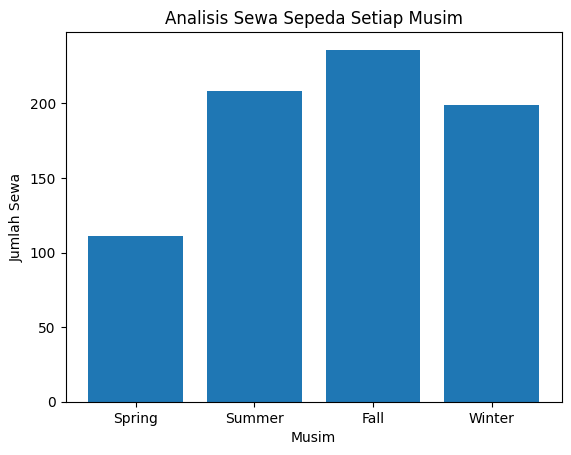

In [36]:
season_data = bike_sharing.groupby('season_daily')['total_count_hourly'].mean()
season_names = ['Spring', 'Summer', 'Fall', 'Winter']

plt.bar(season_names, season_data)
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa')
plt.title('Analisis Sewa Sepeda Setiap Musim')
plt.show()

## Pertanyaan 2: Berapa jumlah pelanggan member dan non member setiap bulan?

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3336\600832514.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_data = bike_sharing.groupby(by="month_daily").agg({


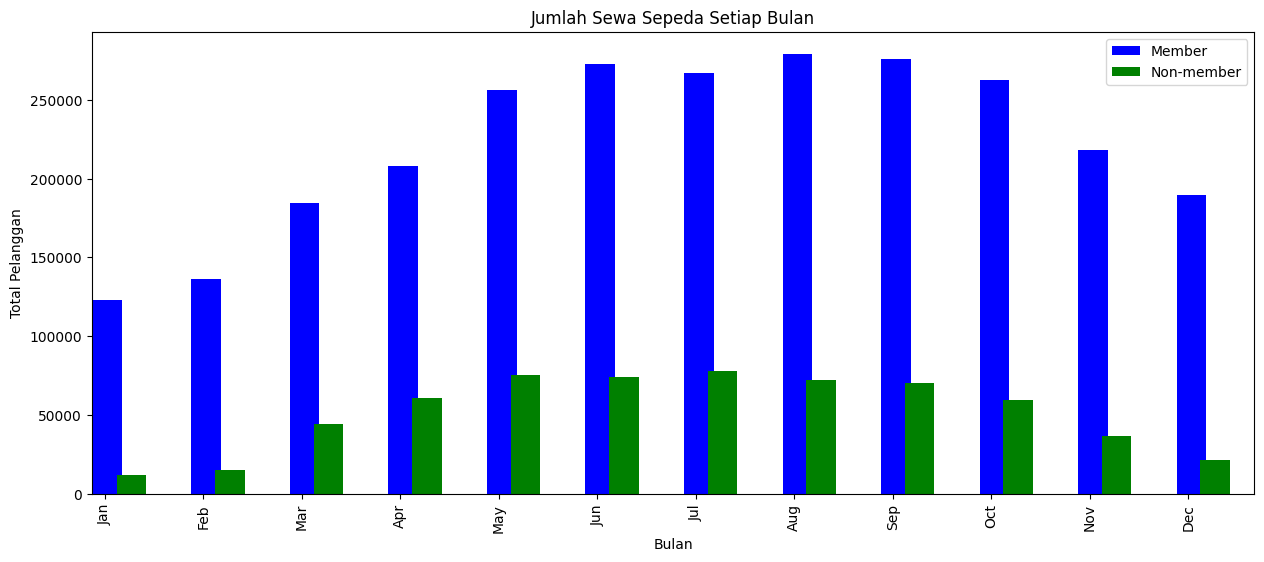

In [35]:
month_data = bike_sharing.groupby(by="month_daily").agg({
    "member_hourly": "sum",
    "nonmember_hourly": ["sum"]
})

# Visualisasi menggunakan Matplotlib
fig, ax = plt.subplots(figsize=(15, 6))

# Visualisasi untuk Member
month_data["member_hourly"]["sum"].plot(kind='bar', color='blue', position=0.4, width=0.3, label='Member', ax=ax)

# Visualisasi untuk Non-member
month_data["nonmember_hourly"]["sum"].plot(kind='bar', color='green', position=-0.4, width=0.3, label='Non-member', ax=ax)

ax.set_title('Jumlah Sewa Sepeda Setiap Bulan')
ax.set_xlabel('Bulan')
ax.set_ylabel('Total Pelanggan')
ax.legend()
plt.show()

## Pertanyaan 3: Berapa perbandingan jumlah sepeda yang disewa pada tahun 2011 dan 2012?

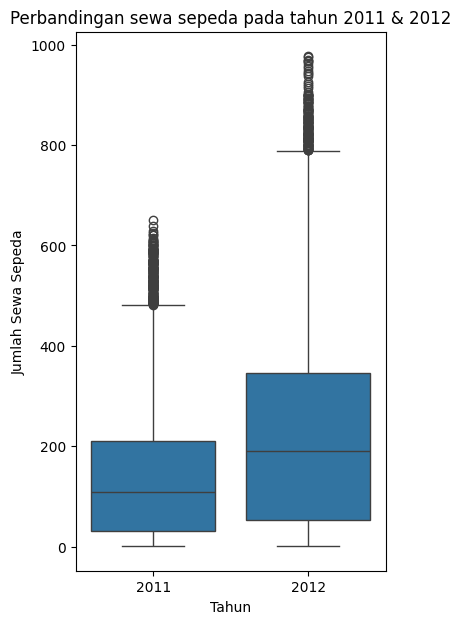

In [37]:
plt.figure(figsize=(4, 7))
sns.boxplot(x="year_daily", y="total_count_hourly", data=bike_sharing)
plt.title("Perbandingan sewa sepeda pada tahun 2011 & 2012")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Sewa Sepeda")
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Diagram diatas disimpulkan musim yang paling laris adalah "FALL"
- Conclution pertanyaan 2 : Diagram diatas disimpulkan bahwa perbandingan non member jauh dibawah dibanding member
- Conclution pertanyaan 3 : Diagram diatas disimpulkan bahwa terdapat peningkatan sewa sepeda dari tahun 2011 ke tahun 2012